In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import pandas as pd
import numpy as np

In [12]:
from get_recommendations_knn import process_embeddings

In [13]:
embeddings_df_scaled = process_embeddings('embeddings_features_mvp.csv')
embeddings_df_scaled.describe()

,0,1,2,3,4,5,6,7,8,9
count,1.287000e+03,1.287000e+03,1.287000e+03,1.287000e+03,1.287000e+03,1.287000e+03,1.287000e+03,1.287000e+03,1.287000e+03,1.287000e+03
mean,-5.894286e-17,-8.203746e-17,-2.298947e-16,1.466225e-17,4.313221e-17,1.231856e-16,1.330197e-16,1.458214e-15,4.977457e-17,-1.302420e-15
std,1.000389e+00,1.000389e+00,1.000389e+00,1.000389e+00,1.000389e+00,1.000389e+00,1.000389e+00,1.000389e+00,1.000389e+00,1.000389e+00
min,-2.361154e+00,-1.973800e+00,-1.860890e+00,-2.243484e+00,-2.734176e+00,-5.752568e-01,-5.537138e-01,-5.728642e-01,-4.750940e-01,-5.513178e-01
25%,-7.608667e-01,-8.946477e-01,-5.307286e-01,-7.829409e-01,-6.139229e-01,-5.752568e-01,-5.537138e-01,-5.728642e-01,-4.750940e-01,-5.513178e-01
50%,-2.190412e-02,5.491068e-02,-1.623959e-01,-1.015589e-01,-8.165451e-02,-5.752568e-01,-5.537138e-01,-5.728642e-01,-4.750940e-01,-5.513178e-01
75%,8.564153e-01,7.770845e-01,2.438888e-01,6.177663e-01,5.102299e-01,-5.752568e-01,-5.537138e-01,-5.728642e-01,-4.750940e-01,-5.513178e-01
max,3.797664e+00,3.177122e+00,4.621794e+00,3.289994e+00,3.783668e+00,1.738354e+00,1.805987e+00,1.745614e+00,2.104847e+00,1.813836e+00


In [18]:
url_index_mapping = pd.read_csv('clean_data/url_index_mapping.csv', index_col = 'url')
url_index_mapping

,index
url,
https://glebekitchen.com/miso-chicken-with-maple-and-ginger/,0
https://glebekitchen.com/tonkotsu-ramen-home/,1
https://glebekitchen.com/garlic-ginger-grilled-chicken/,2
https://glebekitchen.com/tonkotsu-ramen-broth-home/,3
https://glebekitchen.com/japanese-chicken-curry-curry-rice/,4
...,...
https://thewoksoflife.com/cumin-lamb-biang-biang-noodles/,2041
https://thewoksoflife.com/lamb-stew-spicy-sausage/,2042
https://thewoksoflife.com/lamb-stew/,2043


In [9]:
urls = embeddings_df_scaled.sample(10).index
urls

Index(['https://thewoksoflife.com/chicken-garlic-sauce/',
       'https://glebekitchen.com/korean-braised-pork-ribs/',
       'https://thewoksoflife.com/scallion-ginger-shrimp-redux/',
       'https://thewoksoflife.com/palmiers-recipe/',
       'https://thewoksoflife.com/sesame-chicken/',
       'https://thewoksoflife.com/dark-chocolate-pumpkin-scones/',
       'https://thewoksoflife.com/spring-asparagus-beef-stir-fry/',
       'https://thewoksoflife.com/takeout-places-general-tsos-chicken/',
       'https://thewoksoflife.com/dace-fish-black-beans-rice/',
       'https://omnivorescookbook.com/pork-fried-rice/'],
      dtype='object', name='url')

In [58]:
url_index_mapping.loc[urls]

,index
url,
https://thewoksoflife.com/easy-roasted-cauliflower-stir-fry/,1718
https://thewoksoflife.com/curry-beef-bowls/,1524
https://thewoksoflife.com/palmiers-recipe/,1302
https://thewoksoflife.com/stir-fried-shrimp-eggs/,1544
https://thewoksoflife.com/everyday-vegetable-stir-fry/,1627
https://thewoksoflife.com/shrimp-lobster-sauce/,2012
https://glebekitchen.com/chaat-masala-indian-street-food-spice-mix/,88
https://thewoksoflife.com/nian-gao-recipe/,1211
https://thewoksoflife.com/water-spinach-garlic-ginger-fermented-tofu/,1669


In [16]:
from get_recommendations_knn import get_recs_knn_average
_, recs = get_recs_knn_average(embeddings_df_scaled, urls)

In [27]:
recs_dict = url_index_mapping.loc[recs]['index'].to_dict()

https://thewoksoflife.com/stir-fried-lettuce/ 1696


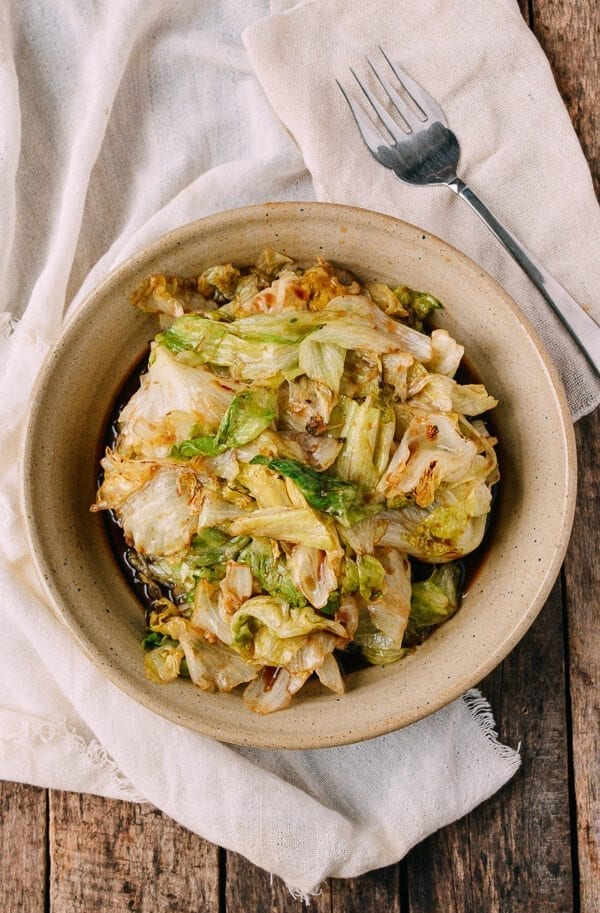

https://omnivorescookbook.com/shu-mai/ 779


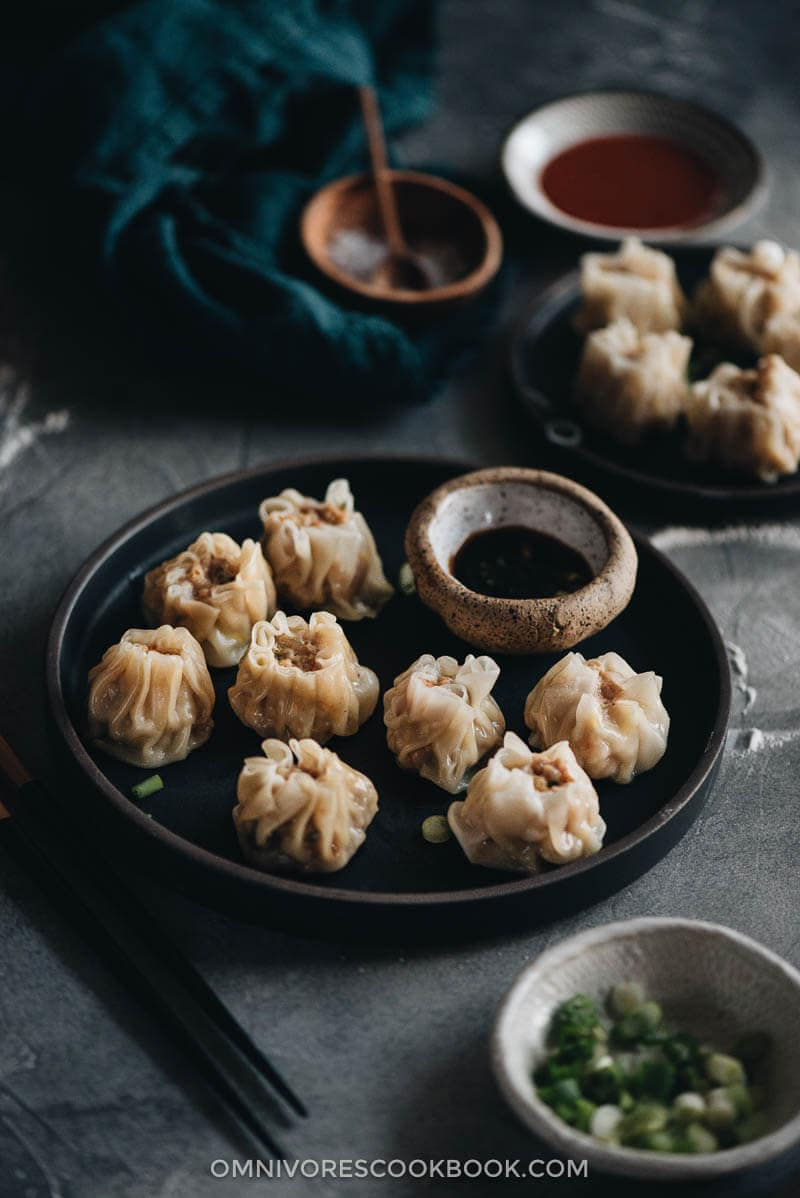

https://thewoksoflife.com/daikon-stir-fry-carrot/ 1644


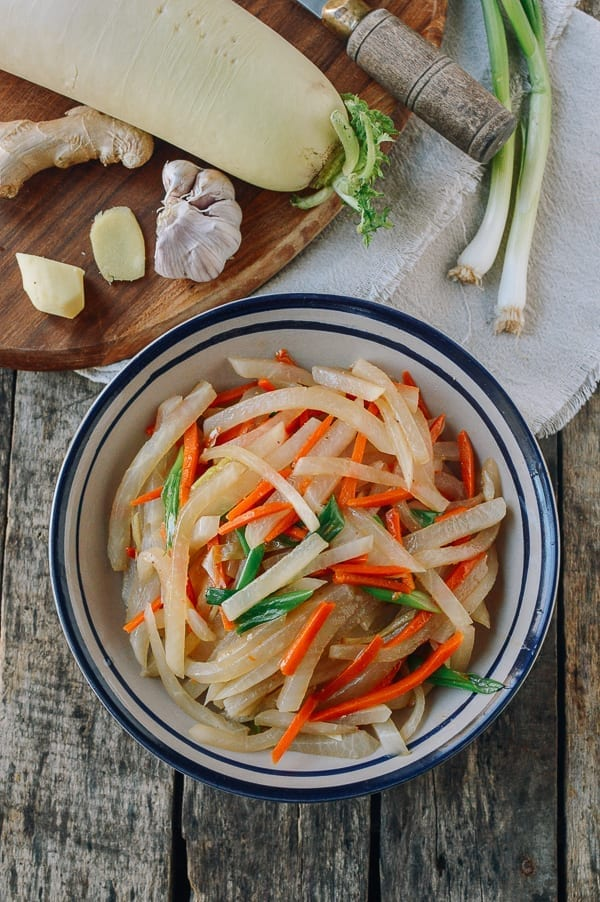

https://omnivorescookbook.com/shrimp-egg-foo-young/ 910


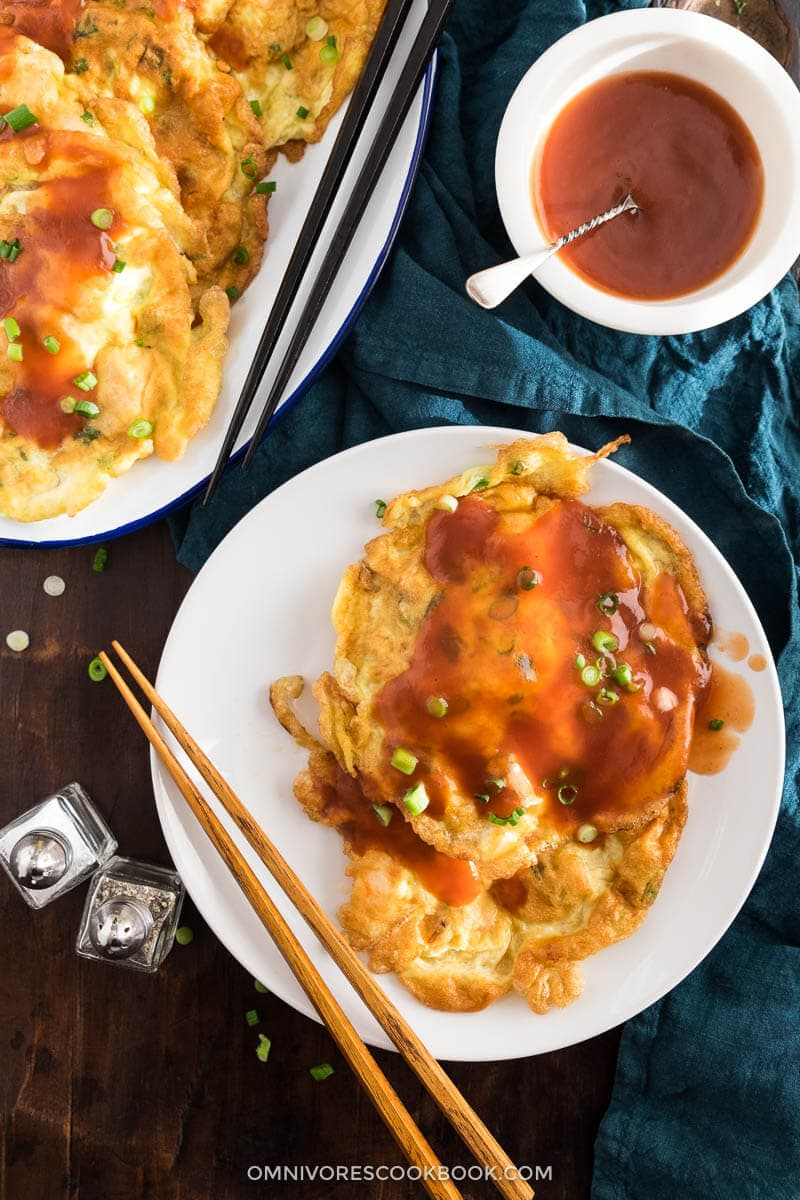

https://thewoksoflife.com/yam-leaves/ 1623


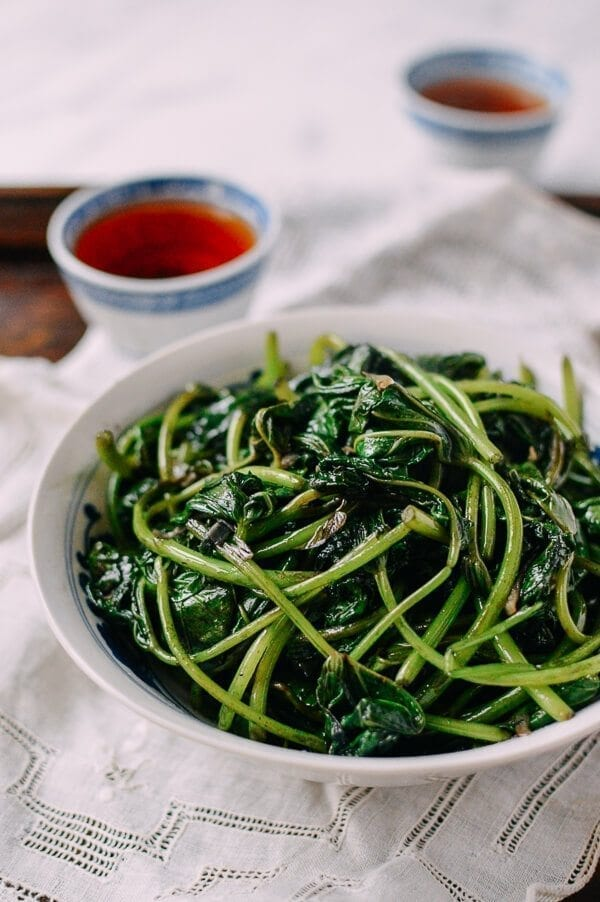

https://thewoksoflife.com/fish-w-spicy-bean-sauce-douban-yu/ 1645


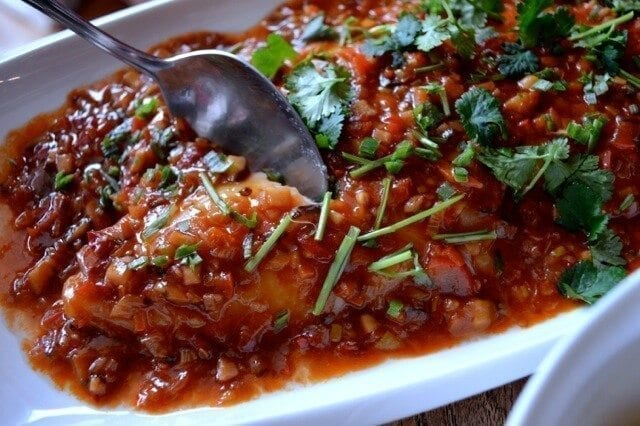

https://thewoksoflife.com/vegetable-five-spice-tofu-stir-fry/ 1715


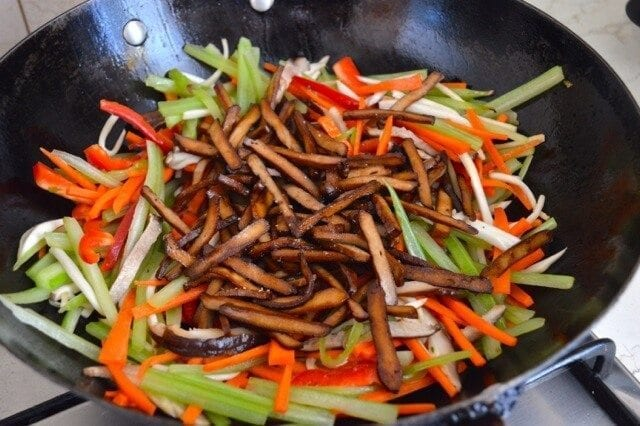

https://omnivorescookbook.com/recipes/yu-xiang-rou-si/ 844


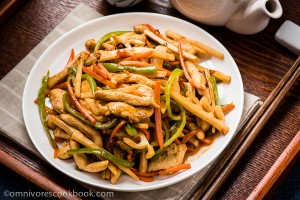

https://thewoksoflife.com/crispy-fried-flounder/ 1981


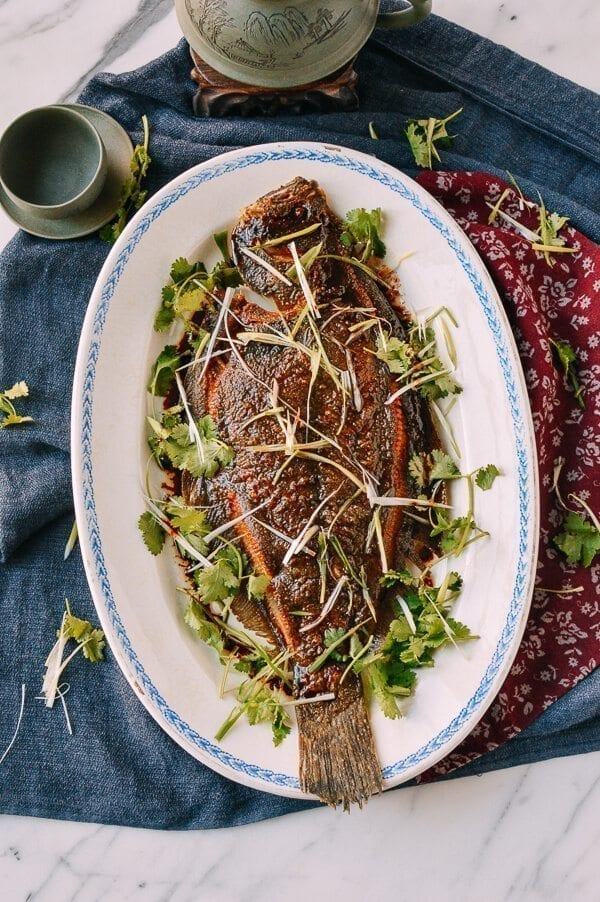

https://thewoksoflife.com/chongqing-chicken/ 1354


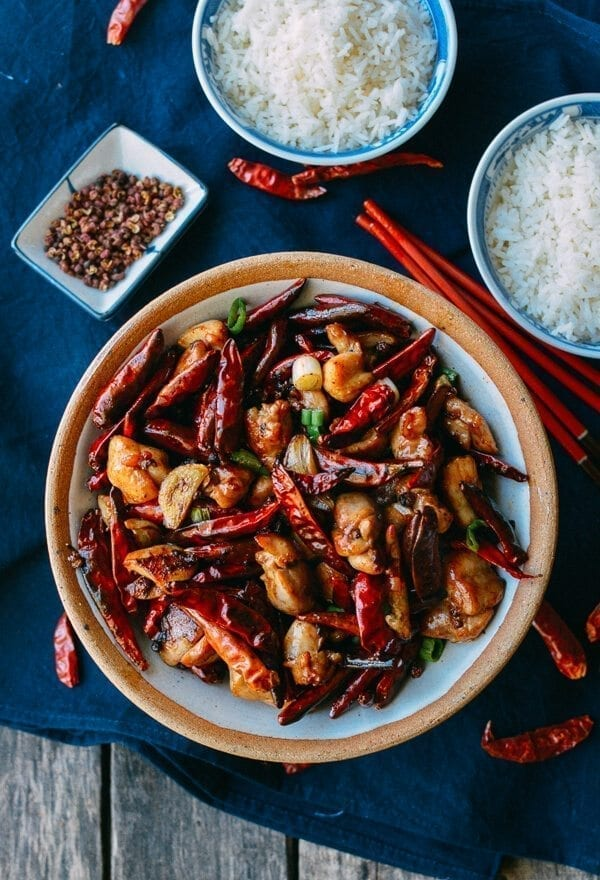

In [35]:
%matplotlib inline
from IPython.display import Image

for url, index in recs_dict.items():
    print(url, index)
    display(Image(f'images/image_{index}.jpg'))